<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/Projeto_4_Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito_com_Regress%C3%A3o_Log%C3%ADstica_e_%C3%81rvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

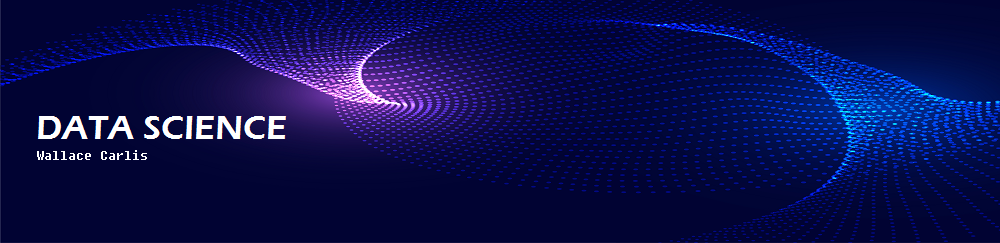

## Detecção de Fraudes em Cartões de Crédito com Regressão Logística e Árvore de Decisão

#### Um belo dia chega uma mensagem em meu celular me informando de uma compra no valor de **1 real**. Em seguida chega outra mensagem de compra, cerca de **R$ 100,00**. Resultado: meu **cartão de crédito** havia sido **fraudado**. Obviamente, tomei as providências necessárias. Contudo, entrei na estatística de mais de **370 mil fraudes em 2020**, praticamente 1  por minuto. Os números não param de crescer, sobretudo, após o início da **pandemia de COVID-19**. Informações retiradas no portal do [valor investe](https://valorinveste.globo.com/produtos/servicos-financeiros/noticia/2021/02/06/tentativas-de-fraudes-saltaram-276percent-em-2020.ghtml).

#### Com isso, neste projeto iremos abordar o problema das **fraudes em cartões de crédito**, uma das principais preocupações das instituições financeiras como **bancos e fintechs**. Recentemente, [estimou-se](https://epocanegocios.globo.com/Brasil/noticia/2019/08/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-r-18-bilhao-em-12-meses.html) que valores de golpes financeiros ultrapassariam a cifra de **R$ 1,8 bilhão de prejuízo por ano**.

#### Tecnicamente, a **não-detecção** da fraude traz tanto prejuízos para os **consumidores** quanto para as **instituições financeiras**. O que também se torna foco de atenção é o **falso positivo**, ou seja, a tentativa de compra **lícita** que acaba sendo **bloqueada** pela administradora do cartão, que imagina ser fraude. Como também ocorreu comigo recentemente.


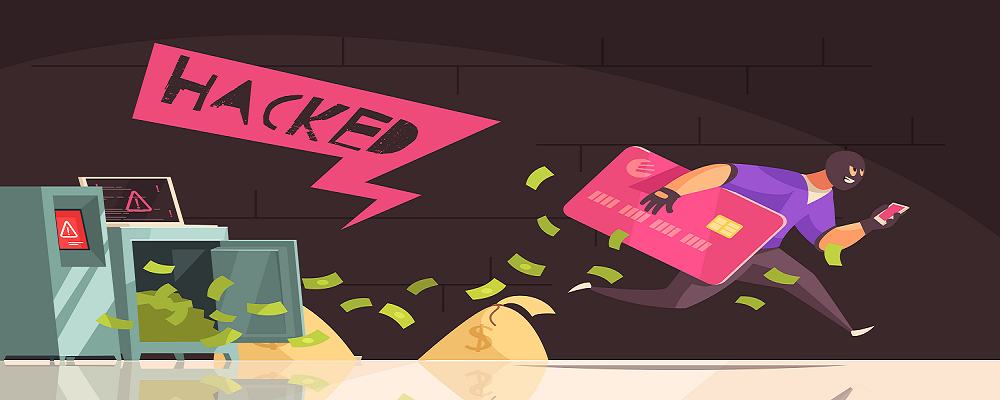

#### Diante de tal cenário, obviamente, o investimento na área de **data science** em **detecção de fraudes** via inteligência artificial (**A.I.**) cresce gerando oportunidades. As empresas já possuem enormes volumes de dados como bases históricas, e, modelos de algoritmos de **machine learning** bem estruturados podem gerar uma economia na casa dos **milhões** de reais.

## Obtendo os Dados

#### Utilizaremos neste projeto dados disponibilizados por algumas empresas européias de cartão de crédito, e a base de dados, que está no site do **[Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)** representa as operações financeiras que aconteceram no período de dois dias, onde veremos que foram classificadas **492 fraudes** dentre quase **285 mil** transações.

#### Duas informações importantes: este é um conjunto de dados muito **desbalanceado**, uma vez que as fraudes representam somente **0,17%** do total de transações. Além disso, as **features** que são todas **numéricas** e foram **descaracterizadas** por questões ligadas à **privacidade e segurança**, receberam nomes sem significados relativos aos seus conteúdos.

#### Como padrão utilizaremos as bibliotecas **Pandas, Matplotlib e Seaborn** para análise e visualização dos dados. Também a **Scikitplot** que precisará de instalação, a **Imblearn** para **balanceamento**, e a **Sklearn** para **padronização** dos dados, para rodar nossos modelos de **machine learning** e apresentar as **métricas** dos resultados.

In [44]:
# Importando os pacotes necessários e instalando o "scikitplot":

# Instalação do "scikitplot"
!pip install -q scikit-plot

# Análise de dados
import pandas as pd
import numpy as np

# Visualizações
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

# Treino e teste
from sklearn.model_selection import train_test_split

# Balanceamento
from imblearn.under_sampling import RandomUnderSampler

# Padronização
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

# Tratamentos
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#### Uma vez os pacotes instalados e importados podemos atribuir a base de dados a uma variável "**df**". Utilizaremos a função de leitura **read_csv()**.

In [45]:
# Atribuindo o arquivo "csv" a base de dados: 
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

#### Por boa prática vamos utilizar a propriedade **shape** para descobrir a quantidade de **linhas e colunas** da base de dados.

In [46]:
# Visualizando a quantidade de linhas e colunas:
df.shape

(284807, 31)

#### Para visualizarmos as primeiras linhas utilizaremos a função **head()**.

In [47]:
# Visualizando as primeiras entradas da base de dados:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Podemos verificar que a maioria das colunas estão com suas nomenclaturas alteradas, exceto **Time** e **Amout**, além da nossa variável **alvo**, a coluna **Class**. A título de informação houve uma transformação **PCA**, redução de dimensionalidade, que justifica o ocorrido, bem como a não discrepância entre os valores encontrados.
#### Além disso, o método **describe()** abaixo irá nos auxiliar com compreensões ainda mais assertivas, sobretudo na coluna **Amount** (quantia em valores), à qual retornaremos mais adiante com alguns filtros.

In [48]:
# Visualizando o resumo estatístico das colunas:
round(df.describe(), 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


#### Buscaremos pelo valores **nulos ou ausentes** que podem inteferir negativamente tanto na **análise** quanto no modelo de **machine learning**.

In [49]:
# Verificando se existem valores nulos ou ausentes:
df.isnull().sum().max()

0

#### Uma vez que não há valores **nulos ou ausentes**, e já que se trata de uma base de dados de **fraudes em cartões de créditos**, uma boa prática é a verificação dos dados na coluna **alvo**, ou seja, a observação do **balanceamento** entre as classes.

In [50]:
# Verificação dos dados na coluna "Class":
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Neste ponto deveremos analisar cuidadosamente o resultado acima. A **classe "0"** obteve mais de **284 mil** registros. Já a **classe "1"** apenas **492**. Portanto, caso submetamos os dados a treino e teste exatamente como estão **com certeza** teremos resultados enviesados, que afetarão o correto entendimento da análise.

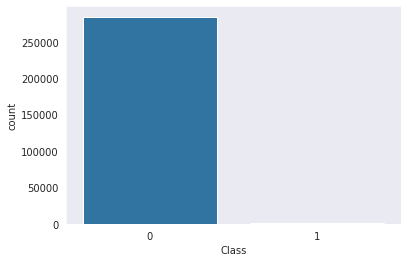

In [51]:
# Visualizando o resultado entre as classes na coluna "Class":
sns.countplot('Class', data=df);

#### Visualizaremos abaixo como se comportam as **distribuições das classes**. Utilizaremos tanto com um **histograma** quanto com um **boxplot**, além de um gráfico de **densidade**.

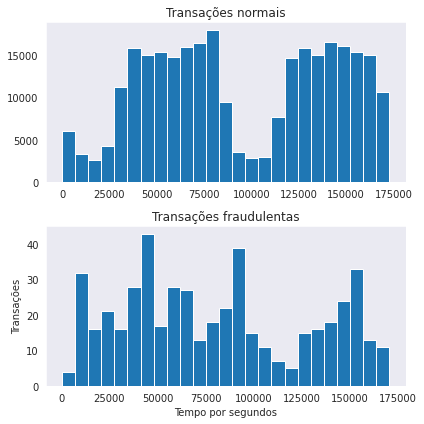

In [52]:
# Visualizando as distribuições das classes com histograma:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))
num_bins = 25
ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Transações normais')
ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Transações fraudulentas')
plt.xlabel('Tempo por segundos')
plt.ylabel('Transações')
plt.tight_layout()

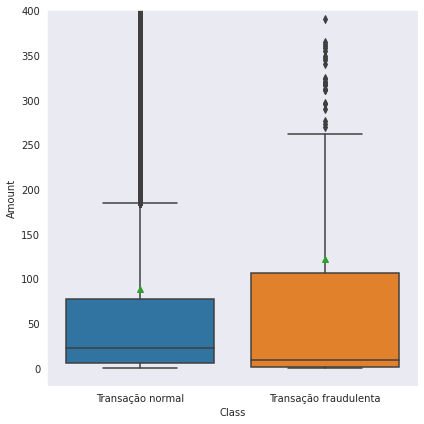

In [53]:
# Visualizando as distribuições das classes com boxplot:
fig, ax = plt.subplots(figsize=(6,6), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Transação normal', 'Transação fraudulenta'])
plt.tight_layout()

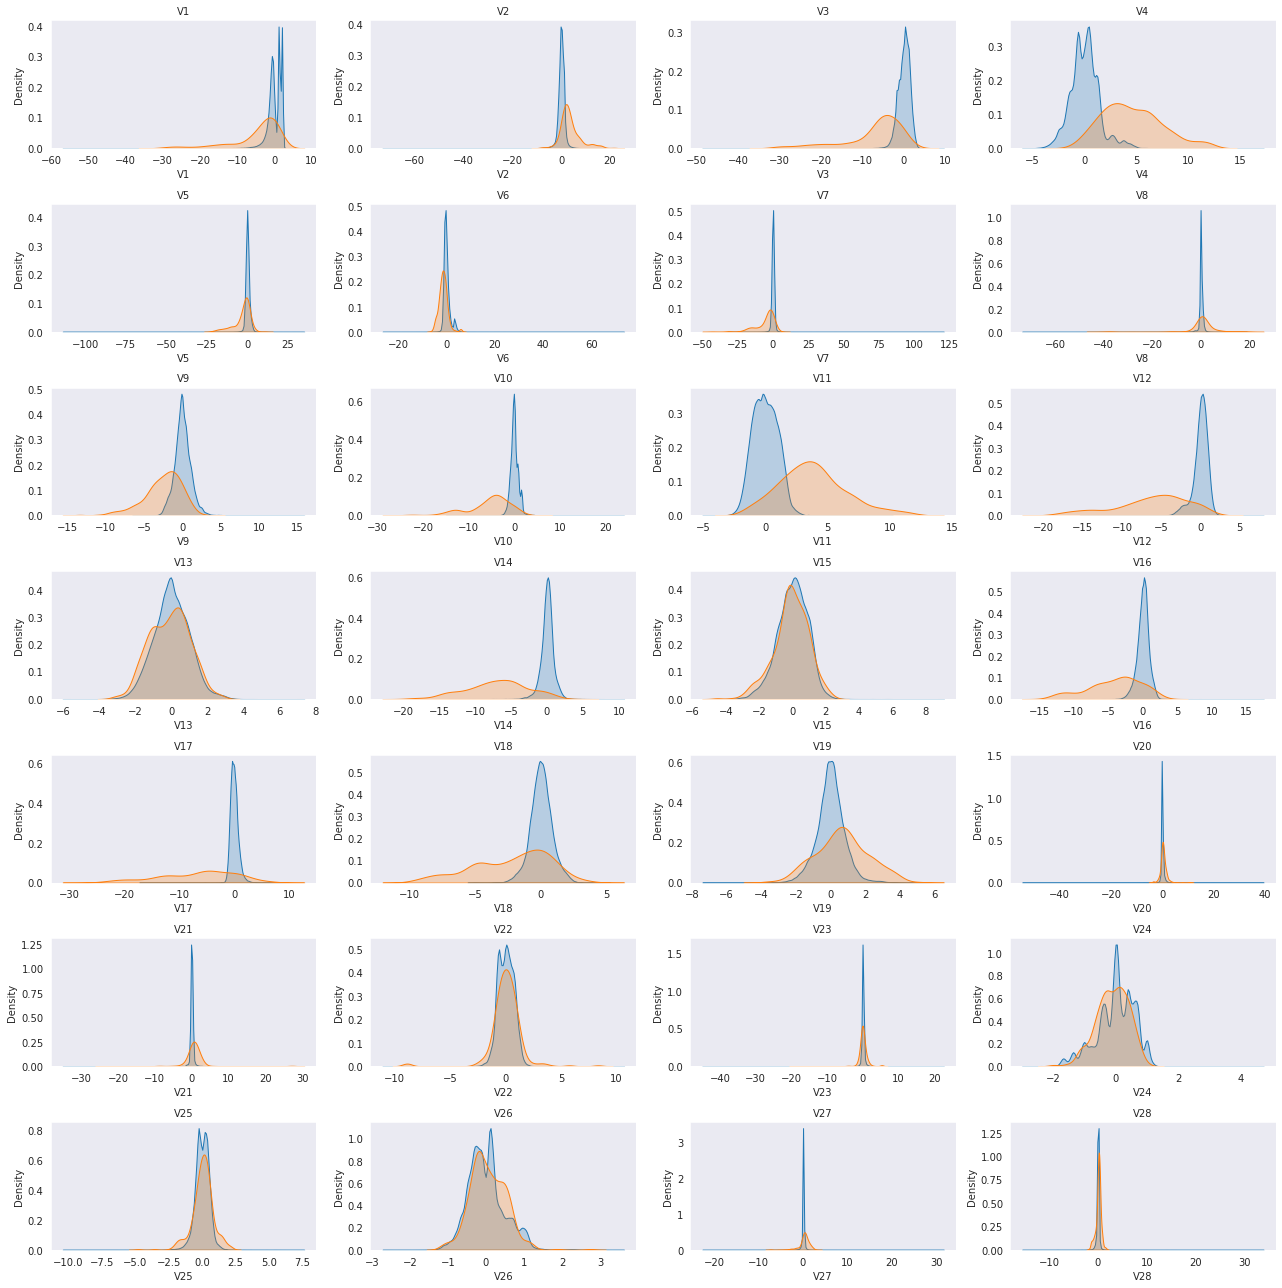

In [54]:
# Visualizando as distribuições das classes com boxplot:
colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
qtd_colunas = len(colunas)
lícita = df[df.Class == 0]
fraude = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

densidade = 0
for col in colunas:
    densidade += 1
    plt.subplot(7, 4, densidade)
    sns.kdeplot(lícita[col], label="Lícita", shade=True)
    sns.kdeplot(fraude[col], label="Fraude", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

#### Após as observações acima percebemos que existem poucas semelhanças entre as **distribuições**, principalmente com o gráfico de densidade que nos permite comparar visualmente cada variável, nos atentando para possíveis anomalias, como na coluna **V10**. Isso que pode contribuir para o treinamento dos modelos de **machine learning**.

#### Antes de prepararmos nosso **modelo** retornaremos ao método **describe** para a coluna **Amount**. Quando chamarmos abaixo o método sem filtros teremos mais de **284 mil** registros, onde a **média** de valores da coluna estará em **88.35**, a **mediana** em **22.00** e o **valor máximo** em **25691.16**. A seguir aplicaremos alguns filtros para utilizarmos de comparação.

In [55]:
# Visualizando o "describe" da coluna "Amount":
round(df.Amount.describe(), 2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

#### Ao aplicarmos abaixo o filtro para a coluna **Classe** que retornam as **fraudes ocorridas** perceberemos que os valores para a coluna **Amount** serão alterados. A quantidade de fraudes vai para **492**, o valor da **média** vai para **122.21**, o da **mediana** vai para **9.25** e o **valor máximo** fraudado para **2125.87**. Vamos aplicar mais um filtro.

In [56]:
# Visualizando o "describe" da coluna "Amount" com o total de fraudes:
round(df[(df.Class == 1)]['Amount'].describe(), 2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

#### Ao filtrarmos as **fraudes** abaixo com valores máximos menores que **850** teremos praticamente **98%** dos casos (**481**). O valor **médio** ficará em **93,49**, a **mediana** em **8.30**, o **3º quartil** em **99.99**, o **desvio padrão** bem alto, em **166.98**, e o **valor máximo** fraudado em **829.41**.

In [57]:
# Visualizando o "describe" da coluna "Amount" com total de fraudes e filtro com valor máximo abaixo de "850":
round(df[(df.Class == 1) & (df.Amount < 850)]['Amount'].describe(), 2)

count    481.00
mean      93.49
std      166.98
min        0.00
25%        1.00
50%        8.30
75%       99.99
max      829.41
Name: Amount, dtype: float64

#### Preparação do modelo de **machine learning**.
#### Uma vez que visualizamos o **desbalanceamento** entre as classes podemos providenciar sua correção. Contudo, para a assertividade do projeto, o ideal é criarmos uma **cópia** da base de dados para nossa **análise** e geração dos modelos de **machine learning**.

In [58]:
# Criando uma cópia (df_clean) da base de dados:
df_clean = df.copy()

#### O passo seguinte será **padronizarmos** as colunas **Time e Amount** por meio da criação de um objeto **Standard Scaler**.

In [59]:
# Criando um objeto para iniciar a padronização "StandarScaler()":
scaler = StandardScaler()

#### Criaremos duas novas colunas para as transformações mencionadas acima. Bem como removeremos as colunas antigas.

In [60]:
# Criando as duas novas colunas para receber as transformações necessárias:
df_clean['Nova_Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Nova_Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

In [61]:
# Removendo as antigas colunas "Time" e "Amount":
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#### Visualizaremos as colunas **criadas e padronizadas**, bem como a exclusão das antigas colunas **Time e Amount**.

In [62]:
# Visualização das transformações mencionadas acima:
df_clean.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Nova_Amount,Nova_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562


#### Após a **padronização** das colunas mencionadas, podemos dividir a base de dados em **treino e teste** explicitando o argumento de que proporcionalmente os conjuntos tenham a mesma quantidade de classes.

In [63]:
# Atribuindo a base de dados a "X" e "y":
X = df_clean.drop('Class', axis=1)
y = df_clean.Class

In [64]:
# Dividindo a base de dados entre "treino e teste":
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True)

#### Podemos **balancear** a base dividida por meio da biblioteca **Imblearn**, optando por preservar a **classe minoritária**.

In [65]:
# Criando um objeto para o balanceamento "RandomUnderSampler()":
rus = RandomUnderSampler()

In [66]:
# Atribuindo a base de dados treinada e aplicando a técnica "Under-Sampling" (preservação da classe minoritária):
X_rus, y_rus = rus.fit_sample(X_train, y_train)

#### Para confirmação do **balanceamento** podemos realizar a contagem de cada classe, bem como **visualizar** graficamente a divisão ocorrida.

In [67]:
# Verificando o balanceamento das classes após o tratamento:
print(pd.Series(y_rus).value_counts())

1    369
0    369
dtype: int64


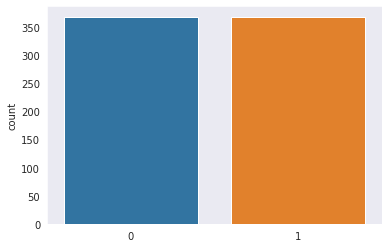

In [68]:
# Visualizando a nova distribuição entre as classes:
sns.countplot(y_rus);

#### Para termos uma correta verificação do que foi realizado vamos comparar numa **matriz de correlação** o antes e depois do tratamento acima: **balanceamento**.

In [69]:
# Criando duas matrizes de correlação: uma apenas com o "X_train", desbalanceado; outra já com o "X_rus", balanceado:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

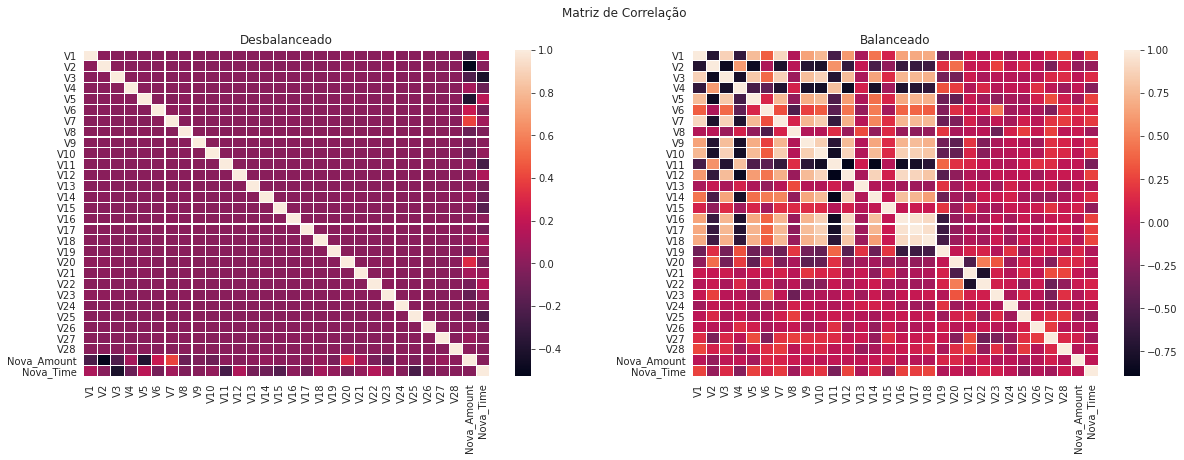

In [70]:
# Plotando ambas matrizes de correlação:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
fig.suptitle('Matriz de Correlação')

# X_train "desbalanceado"
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1,  ax=ax[0])
ax[0].set_title('Desbalanceado')

# X_rus "balanceado"
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1,  ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

#### Com as preparações realizadas na base de dados podemos iniciar a construção dos modelos de **machine learning**. Vamos optar inicialmente pela **Regressão Logística**.

In [71]:
# Criando um objeto para "LogisticRegression":
np.random.seed(2)
model_lr = LogisticRegression()

In [72]:
# Treinando o modelo para a "Regressão Logística"
model_lr.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# Atribuindo previsão sobre os dados de teste:
y_pred_lr = model_lr.predict(X_test)

# Atribuindo a probabilidade:
y_proba_lr = model_lr.predict_proba(X_test)

# Visualizando alguns resultados sobre a probabilidade:
y_proba_lr[0:3]

array([[0.57761552, 0.42238448],
       [0.98313731, 0.01686269],
       [0.92861704, 0.07138296]])

#### Após o **treinamento e a previsão**, podemos avaliar o desempenho do modelo. Utilizaremos tanto a **matriz de confusão** quanto um relatório mais completo, o **classification_report**.

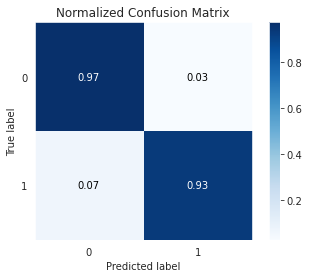

In [74]:
# Plotando uma "matrix de confusão" com o resultado obtido:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True);

In [75]:
# Imprimindo relatório de classificação:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, digits=4))

# Destacando a "acurácia" do modelo:
print("Acurácia para Regressão Logística: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr)))

# Destacando a "área sob a curva":
print("AUC para Regressão Logística: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9684    0.9839     71079
           1     0.0486    0.9350    0.0925       123

    accuracy                         0.9683     71202
   macro avg     0.5243    0.9517    0.5382     71202
weighted avg     0.9982    0.9683    0.9823     71202

Acurácia para Regressão Logística: 0.9683

AUC para Regressão Logística: 0.9517



#### Uma vez que o treinamento foi realizado e gerado resultado para a **Regressão Logística** podemos utilizar basicamente a mesma compreensão para ajuste e submeter os dados ao algoritmo **Árvore de Decisão**.

In [76]:
# Criando um objeto para "DecisionTreeClassifier" e escolhendo 2 hiperparâmetros, no caso, sua profundidade e entropia:
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

In [77]:
# Treinando o modelo para "Árvore de Decisão":
model_tree.fit(X_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
# Atribuindo previsão e probabilidade sobre os dados de teste:
y_pred_tree = model_tree.predict(X_test)

# Atribuindo a probabilidade:
y_proba_tree = model_tree.predict_proba(X_test)

# Visualizando alguns resultados sobre a probabilidade:
y_proba_tree[0:3]

array([[0.5       , 0.5       ],
       [0.875     , 0.125     ],
       [0.98770492, 0.01229508]])

#### Após **treinamento e previsão**, podemos avaliar o desempenho do modelo. Utilizaremos novamente tanto a **matriz de confusão** quanto um relatório mais completo, o **classification_report**.

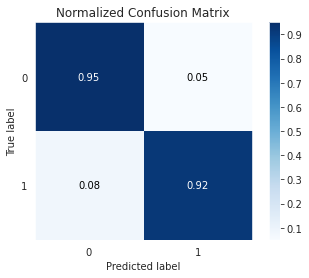

In [83]:
# Plotando uma "matrix de confusão" com o resultado obtido:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree, normalize=True);

In [84]:
# Imprimindo um relatório de classificação:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree, digits=4))

# Destacando a "acurácia" do modelo:
print("Acurácia obtida para Árvore de Classificação: {:.4f}\n".format(accuracy_score(y_test, y_pred_tree)))

# Destacando a "área sob a curva":
print("AUC para Árvore de Classificação: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9489    0.9737     71079
           1     0.0302    0.9187    0.0585       123

    accuracy                         0.9489     71202
   macro avg     0.5150    0.9338    0.5161     71202
weighted avg     0.9982    0.9489    0.9721     71202

Acurácia obtida para Árvore de Classificação: 0.9489

AUC para Árvore de Classificação: 0.9338



## Concluindo

#### Os resultados utilizando os algoritmos de **Regressão Logística e Árvore de Decisão** foram realmente satisfatórios sendo a **acurácia** ao redor de **95%**, contudo, ainda estamos falando de **fraudes**, portanto, **perdas**, sejam elas financeiras ou bens, uma vez que tanto empresas quanto consumidores são lesados pela prática criminosa.

#### Com relação aos dados nos facilitou estarem bem tratados e limpos, sem **valores ausentes** ou **variáveis categóricas**, mas tivemos que trabalhar a **padronização** e o **balanceamento**, lembrando que na base de dados havia ocorrido a transformação **PCA** (**redução de dimensionalidade**). Além disso, pudemos verificar que cerca de **98% das fraudes** ocorreram até o valor máximo de **850** euros. Informação relevante para os tomadores de decisão.

#### Sempre pode-se melhorar algo, apesar do bom resultado final, podemos ainda realizar testes com outro modelos de classificação como **Random Forest**, **SVM** e **Rede Neural**, por exemplo, bem como trabalhar os argumentos dos **hiperparâmetros** dos modelos utilizados.